<a href="https://colab.research.google.com/github/elinabhasin/DIY-Deep-Learning/blob/main/perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1163]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import Perceptron

In [1164]:
df = pd.read_csv('/content/Titanic-Dataset.csv')
df.shape

(891, 12)

In [1165]:
df.drop(['Cabin','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [1166]:
df.dropna(subset='Embarked',inplace=True)

In [1167]:
df.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
5,0,3,male,NaN,0,0,8.4583,Q
6,0,1,male,54.0,0,0,51.8625,S
7,0,3,male,2.0,3,1,21.0750,S
8,1,3,female,27.0,0,2,11.1333,S
9,1,2,female,14.0,1,0,30.0708,C


In [1168]:
(df.isnull().sum()/len(df))*100

,0
Survived,0.000000
Pclass,0.000000
Sex,0.000000
Age,19.910011
SibSp,0.000000
Parch,0.000000
Fare,0.000000
Embarked,0.000000


<Axes: >

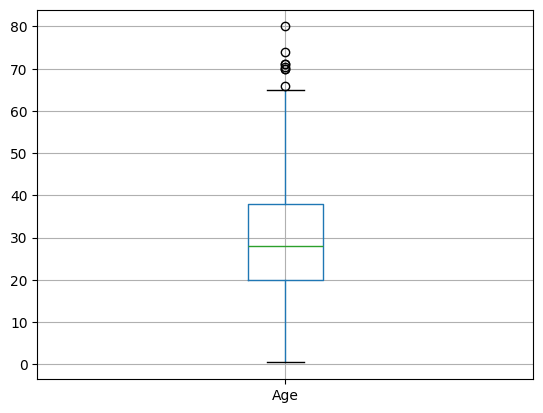

In [1169]:
df.boxplot(column = 'Age')

In [1170]:
df.Age.skew()

np.float64(0.3888806178753708)

<Axes: >

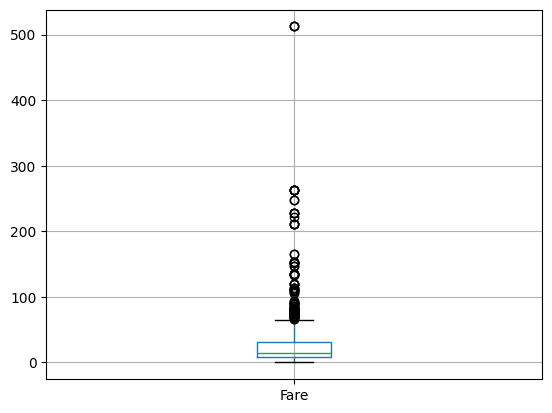

In [1171]:
df.boxplot(column='Fare')

In [1172]:
pt = PowerTransformer(method='yeo-johnson')
df.Fare = pt.fit_transform(pd.DataFrame(df.Fare))

In [1173]:
le = LabelEncoder()
df.Sex = le.fit_transform(df.Sex)
df.Embarked = le.fit_transform(df.Embarked)

<Axes: >

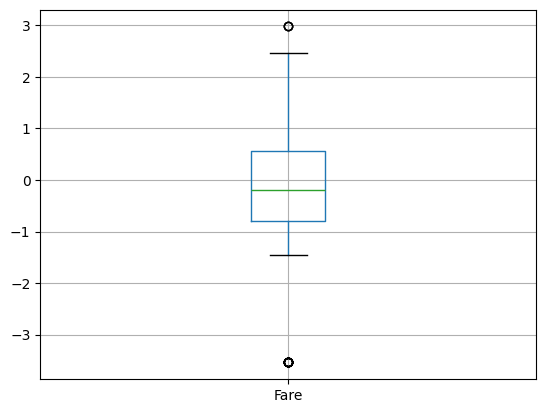

In [1174]:
df.boxplot(column ='Fare')

In [1198]:
df.fillna({'Age' : np.mean(df.Age)},inplace=True)

In [1176]:
df.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [1177]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,-0.876580,2
1,1,1,0,38.0,1,0,1.341242,0
2,1,3,0,26.0,0,0,-0.787660,2
3,1,1,0,35.0,1,0,1.071865,2
4,0,3,1,35.0,0,0,-0.772006,2


In [1178]:
X = df.drop('Survived',axis=1)

In [1179]:
y = df.Survived

In [1180]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

In [1181]:
print(np.isinf(X_train).any())

Pclass      False
Sex         False
Age         False
SibSp       False
Parch       False
Fare        False
Embarked    False
dtype: bool


**Sklearn perceptron implementation.**

In [1182]:
perceptron = Perceptron(penalty=None, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True,
                        verbose=0, eta0=00.01, n_jobs=None, random_state=0,early_stopping=False, validation_fraction=0.1, n_iter_no_change=10, class_weight=None, warm_start=False)

In [1183]:
perceptron.fit(X_train,y_train)

Perceptron(eta0=0.01, n_iter_no_change=10)

In [1184]:
y_pred = perceptron.predict(X_test)

In [1185]:
acc = accuracy_score(y_pred,y_test)

In [1186]:
print(acc)

0.46629213483146065


In [1187]:
perceptron.coef_

array([[ 0.44      , -5.81      ,  0.15498848, -1.4       , -0.71      ,
         3.4448312 ,  0.02      ]])

In [1188]:
perceptron.intercept_

array([3.45])

**Perceptron from scratch.**

In [1189]:
def unit_step_function(X):
  return np.where(X>=0, 1, 0)

In [1190]:
class Model:
  def __init__(self,eta,n_iter):
    self.eta = eta
    self.n_iter = n_iter
    self.bias = 0

  def fit(self,X,y):

    n_samples, n_features = X.shape
    self.weights = np.zeros(n_features)

    for iter in range(self.n_iter):
      for index, sample in enumerate(X_train.values):
        sum = (np.dot(sample,self.weights)) + (1*self.bias)
        y_pred = unit_step_function(sum)

        target = y.iloc[index].item()
        if y_pred!= target:
          error = target - y_pred
          self.weights = self.weights + (self.eta * error *sample)
          self.bias = self.bias + self.eta * error * 1

  def predict(self,X):
    sum = (np.dot(X,self.weights)) + (self.bias)
    y_pred = unit_step_function(sum)
    return y_pred

In [1191]:
def accuracy(y_true, y_pred):
  accuracy = np.sum(y_true == y_pred) / len(y_true)
  return accuracy

In [1192]:
my_model = Model(0.01,10)

In [1193]:
my_model.fit(X_train,y_train)

In [1194]:
print(my_model.bias)

1.9500000000000015


In [1195]:
y_pred = my_model.predict(X_test)

In [1196]:
print(accuracy(y_test,y_pred))

0.6910112359550562


**Testing the model using sklearn weights and biases.**

In [1197]:
def predict(X):
    sum = (np.dot(X,[ 0.44      , -5.81      ,  0.15498848, -1.4       , -0.71      ,
         3.4448312 ,  0.02      ])) + (3.45)
    y_pred = unit_step_function(sum)
    return y_pred
y_pred = predict(X_test)
print(accuracy(y_test,y_pred))

0.46629213483146065
